sports car 53.715206146240234


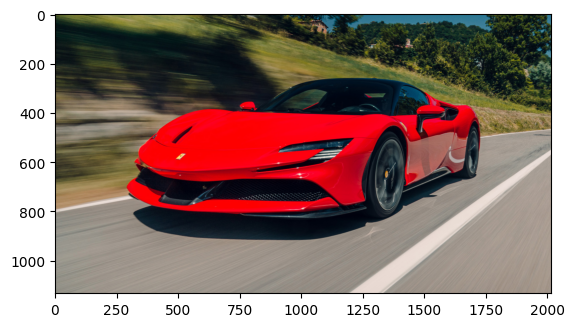

In [11]:
import matplotlib.pyplot as plt
from PIL import Image
import torch
import numpy as np
from resnet_pretrained import preprocess, model

def showInRow(list_of_images, titles = None):
  count = len(list_of_images)
  for idx in range(count):
    subplot = plt.subplot(1, count, idx+1)
    if titles is not None:
      subplot.set_title(titles[idx])
      
    img = list_of_images[idx]
    cmap = 'gray' if (len(img.shape) == 2 or img.shape[2] == 1) else None
    subplot.imshow(img, cmap=cmap)
  plt.show()

test_images_count = 1

for i in range(1, test_images_count + 1):
  image = Image.open(f'./testing_images/{i}.jpg')

  input = preprocess(image)

  output = model(input)

  with open('./imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]
    _, index = torch.max(output, 1)

    percentage = torch.nn.functional.softmax(output, dim=1)[0] * 100

    print(labels[index[0]], percentage[index[0]].item())
    
    
    showInRow([np.array(image)])
    